#**ASSIGMENT ONE:** Bag of Words implementation for Sentiment analysis 💭


Once Jeff finished his coffee, he settled into his desk at Amazon's bustling headquarters in Seattle. As a data analyst at the world's largest online retailer, Jeff was accustomed to diving deep into the ocean of data generated by millions of transactions every day.

Today, Jeff had a new challenge on his plate. The marketing team wanted to gain insights into customer sentiment regarding their latest products. Specifically, they were interested in understanding whether customers were generally satisfied or dissatisfied with their purchases.

After pondering over various approaches, Jeff decided to task his team of interns with a hands-on assignment to implement Bag of Words (BoW) and Naive Bayes classification for sentiment analysis on Amazon reviews.

As an intern is your task to complete this challenge the best way possible to impress your boss and hopefully get a full time position at the company.  

The following notebook will guide you into how to create your BoW implementation for sentiment analysis and hopefully make jeff happy 🤭

As a first step we need to get all of our data ready

In [ ]:
#download train and test set
!gdown  https://drive.google.com/file/d/1bcnYdTHuY2pr4py5tG-HtNU73pJzRH7U/view?usp=sharing --fuzzy
!gdown  https://drive.google.com/file/d/1T19F6Oge0-qHMqX_IKiU_l94Y1k2oLJp/view?usp=sharing --fuzzy

Downloading...
From (original): https://drive.google.com/uc?id=1bcnYdTHuY2pr4py5tG-HtNU73pJzRH7U
From (redirected): https://drive.google.com/uc?id=1bcnYdTHuY2pr4py5tG-HtNU73pJzRH7U&confirm=t&uuid=99bfbaac-8a4b-4eb0-9f02-1debadabd014
To: /content/train.ft.zip
100% 615M/615M [00:08<00:00, 73.9MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1T19F6Oge0-qHMqX_IKiU_l94Y1k2oLJp
From (redirected): https://drive.google.com/uc?id=1T19F6Oge0-qHMqX_IKiU_l94Y1k2oLJp&confirm=t&uuid=77bdb12f-f403-4a73-9414-2ddc96bf565f
To: /content/test.ft.zip
100% 70.3M/70.3M [00:00<00:00, 101MB/s] 


In [ ]:
#unzip
!unzip train.ft.zip
!unzip test.ft.zip

Archive:  train.ft.zip
  inflating: train.ft.txt            
Archive:  test.ft.zip
  inflating: test.ft.txt             


Our txts has the following format


```
__label__#  This is a review ....

```

As you see the first word refers to the label, `__label__1` corresponds to 1- and
2-star reviews(negative sentiment) and `__label__2` corresponds to to 4- and 5-star reviews (positive sentiment).

Normally reviews are very messy including words with incorrect spelling, different formats and a lot of words that do not add any value to our classification. Let's create a method to clean them

In [ ]:
#import nltk libray, you are going to need this later
import nltk
import pandas as pd
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import string
import re
from nltk.corpus import stopwords
def preprocess_text(text):
  """ Method to clean reviews from noise and standarize text across the different classes.
      The preprocessing includes converting to lowercase, removing punctuation, and removing stopwords.
  Arguments
  ---------
  text : String
     Text to clean
  Returns
  -------
  text : String
      Cleaned text
  """
  stop_words = set(stopwords.words('english'))

  text = text.lower() #make everything lower case
  text = text.replace('\n', ' ') #remove \n characters
  text = re.sub(r'[^\w\s]', ' ', text) #remove any punctuation or special characters
  text = re.sub(r'\d+', '', text) #remove all numbers
  text = ' '.join([word for word in text.split() if word not in stop_words]) #remove all stopwords (see imports to help you with this)

  return text

It's also useful to have our data organized and ready to access! An great library for this is [pandas](https://pandas.pydata.org/). In the folowing code cell you will create a dataframe containing all the data provided in the training document. Please be patient this code cell can take up to 10 min (is a big dataset!)

In [ ]:
def create_dataframe(path_to_file):
  """ Creates dataframe of reviews and labels
  Arguments
  ---------
  path_to_file : str
      path to file to read
  Returns
  -------
  df : pandas dataframe
      Dataframe of reviews and labels
  """
  df={}
  index= 0
  with open(path_to_file) as f:
    for line in f:
      label_text = line.split(' ')[0] #get label from line in file
      text = ' '.join(line.split(' ')[1:]) #get text of the review
      label = 0 if label_text == '__label__1' else 1 # get numeric value of label_text. If label_text is __label__1 then label = 0 if __label__2 label = 1
      text = preprocess_text(text) #preprocess text
      df[index] = {'label': label, 'text': text} #create dictionary with keys "label" and "text" and set the correct values
      index+=1
  return pd.DataFrame.from_dict(df,orient='index')

df_train= create_dataframe('train.ft.txt')
df_test= create_dataframe('test.ft.txt')

In [ ]:
def vocab_dictionary(df):
  """ Creates dictionary of frequencies based on a dataset of reviews
  Arguments
  ---------
  dataset : list of tuples
      list of tuples of the form (label, text)
  Returns
  -------
  vocab_dict : dictonary
      Dictionary of words and their frequencies with the format {word: frequency}
  """

  vocab= {} #create empty dictionary
  #iterate through rows of df and count the frequency of words
  for index, row in df.iterrows():
        # Split the review text into words
        words = row['text'].split()

        # Count the frequency of each word
        for word in words:
            if word in vocab:
                vocab[word] += 1
            else:
                vocab[word] = 1

  return vocab


full_vocab=vocab_dictionary(df_train)
positive_vocab = vocab_dictionary(df_train[df_train['label']==1]) #We create a positive vocab to keep track of words in positive reviews. This will come in handy later
negative_vocab = vocab_dictionary(df_train[df_train['label']==0]) #We create a negative vocab to keep track of words in negative reviews. This will come in handy later

Let's take a look to out training vocabulary, in the following cell create a sorted dictionary by frequency from most frequent to less frequent tokens

In [ ]:
vocab_sorted = sorted(full_vocab.items(), key=lambda item: item[1], reverse=True) #sort full_vocab from words with high frequency to low frequency

In [ ]:
from itertools import islice

first_tokens = list(islice(vocab_sorted, 30)) # Take first 30 tokens of each vocabulary

In order to see Zip's law first hand, let's plot the first 30 most frequent words of each vocabulary

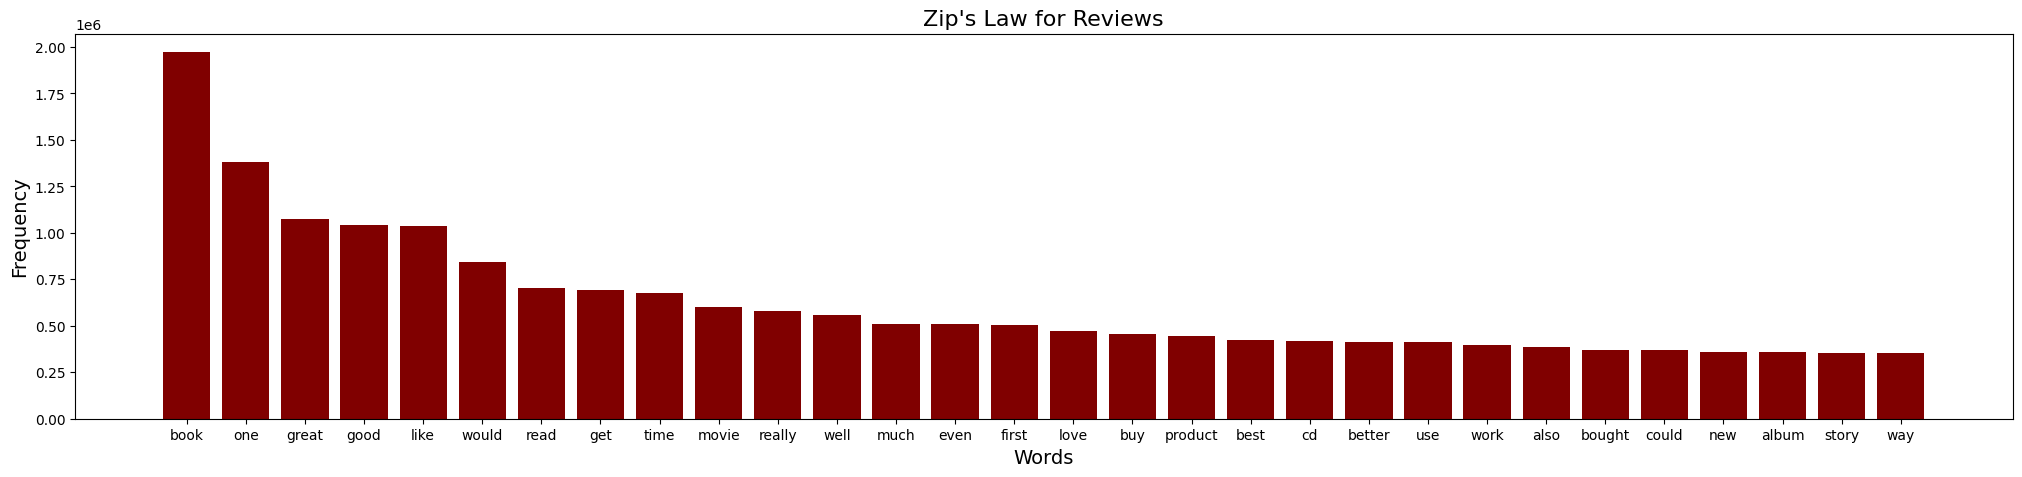

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (25, 5))

#TODO: Create bar chart of the 30 most frequent words in reviews with appropriate title and axis labels

# Split the words and frequencies into two lists for plotting
words, frequencies = zip(*first_tokens)

plt.bar(words, frequencies, color='Maroon')

# Set the title and axis labels
plt.title('Zip\'s Law for Reviews', fontsize=16)
plt.xlabel('Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.show()

Let's check the size of our vocabulary

In [ ]:
print('Vocabulary size:',len(full_vocab))

Vocabulary size: 889508


Now that our reviews are "clean" let's start the real work. Naive bayes includes three important components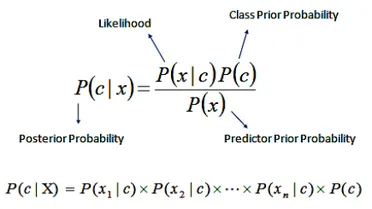

We need to calculate two things for the posterior probability: the likelihood and the class prior probability (since is naive bayes we ignore the predictor prior probability)

Let's first calculate the class prior probability. This meaning the probability a review is positive or negative without taking into account the content.

In [ ]:
full_vocab_length = len(full_vocab)
positive_prior = len(positive_vocab) / full_vocab_length if full_vocab_length > 0 else 0 #calculate positive prior
negative_prior = len(negative_vocab) / full_vocab_length if full_vocab_length > 0 else 0 #calculate negative prior

Now let's create a method to calculate the log likelihood of each word in our vocabulary

In [ ]:
import math
SMOOTHING_FACTOR = 0.2
def calculate_log_likelihood(vocab, positive_vocab, negative_vocab, smoothing_factor=SMOOTHING_FACTOR):
  """ Calculates log likelihood of words belonging to a positive or negative review given a dataset and vocabulary
  Arguments
  ---------
  dataset : list of tuples
      List of positive or negative reviews with their respective label (label, text)
  vocab : dictionary
      Vocabulary of words in the dataset with their respective frequencies
  Returns
  -------
  likelihood : dictionary of dictionaries
      Dictionary of words and their positive and negative log likelihood with format {word: {'positive': log_likelihood, 'negative': log_likelihood}}
  """
  likelihood = {}
  # TODO: create a dictionary with the log likelihoods of each word
  number_instances_positive = sum(positive_vocab.values()) #number of words in positive_vocab
  number_instances_negative = sum(negative_vocab.values()) #number of words in negative_vocab
  number_types = len(vocab) #number of words in all vocab


  for word, count in vocab.items():
    likelihood[word] = {}
    # TODO: Calculate positive and negative log likelihood for EACH word.
    # IMPORTANT: remember some words might be in positives but not negatives (or the other way around, thats why we use the smoothing factor!)

    # Frequency of the word in positive and negative vocab (if not present, it's 0)
    positive_word_count = positive_vocab.get(word, 0)
    negative_word_count = negative_vocab.get(word, 0)

    # Calculate smoothed probabilities for positive and negative likelihoods
    positive_probability = (positive_word_count + smoothing_factor) / (number_instances_positive + smoothing_factor * number_types)
    negative_probability = (negative_word_count + smoothing_factor) / (number_instances_negative + smoothing_factor * number_types)

    # Calculate log likelihood
    likelihood[word]['positive'] = math.log(positive_probability)
    likelihood[word]['negative'] = math.log(negative_probability)
  return likelihood

likelihood = calculate_log_likelihood(full_vocab,positive_vocab,negative_vocab)


Let's make sure we don't have any bugs till now

In [ ]:
assert  round(sum([math.exp(likelihood[word]['positive']) for word in likelihood]))==1 , "There is probably a bug calculating the positive log likelihood"
assert  round(sum([math.exp(likelihood[word]['negative']) for word in likelihood]))==1 , "There is probably a bug calculating the negative log likelihood"
print("Great job! Keep going!")

Great job! Keep going!


Now the most essential function in our program, the method to actually classify unseen reviews.

In [ ]:
def classify_review(text, likelihood, positive_prior, negative_prior):

    """ Calculates log scores for a new text given some prior probabilities and likelihoods
    Arguments
    ---------
    text : string
        Text to classify
    likelihood_positive : dictionary
        Dictionary of words and their log likelihood for positive reviews
    likelihood_negative : dictionary
        Dictionary of words and their log likelihood for negative reviews
    positive_prior : float
        Prior probability of a review being positive
    negative_prior : float
        Prior probability of a review being negative
    Returns
    -------
    predicted sentiment : string
        Predicted sentiment of the text
    sentiment_scores : tuple or dictionary
        Tuple of positive and negative sentiment scores
    """
    tokens = preprocess_text(text).split() # Preprocess the input review

    # Calculate the log scores for each sentiment category (take into account value for unseen tokens)
    log_score_positive = math.log(positive_prior)
    log_score_negative = math.log(negative_prior)

    # Calculate the log scores for each sentiment category
    for token in tokens:
        if token in likelihood:
            log_score_positive += likelihood[token]['positive']
            log_score_negative += likelihood[token]['negative']
        else:
            # Handle unseen tokens
            # Apply a small adjustment based on the smoothing factor
            unseen_adjustment = math.log(SMOOTHING_FACTOR / (len(likelihood) + 1))
            log_score_positive += unseen_adjustment
            log_score_negative += unseen_adjustment

    sentiment_scores = {
        'positive': log_score_positive,
        'negative': log_score_negative,
    }


    predicted_sentiment = 'positive' if log_score_positive > log_score_negative else 'negative'  # Determine the predicted sentiment based on the highest sentiment score


    return predicted_sentiment, sentiment_scores

In [ ]:
text="This hair dryer is terribly bad, it doesn't work at all"
predicted_sentiment, sentiment_scores = classify_review(text, likelihood,
                               positive_prior, negative_prior)
print(predicted_sentiment)
print(sentiment_scores)
#You should see here a correct prediction of negative

negative
{'positive': -42.079896719588966, 'negative': -38.7227409518379}


In [ ]:
text='This product was amazing I would buy it again'
predicted_sentiment, sentiment_scores = classify_review(text, likelihood,
                               positive_prior, negative_prior)
print(predicted_sentiment)
print(sentiment_scores)
#You should see here a correct prediction of positive

positive
{'positive': -24.656673258269976, 'negative': -25.093960927317422}


## Let's test our model

In all machine learning workflows is essential to test how well our model does with unseen data. Let's try testing the model with the provided test dataframe we created at the beggining, you remember?

In [ ]:
true_negatives = 0
false_negatives = 0
true_positives = 0
false_positives = 0

for index,review in df_test.iterrows():
  true_label = review['label']
  text = review['text']
  #TODO: Iterate through test set, compare true label with predicted label and get evaluation metrics (precision, recall and F1)
  # Be patient! This code might take a while (about 5 minutes)
  # Classify the review using the classify_review function
  predicted_sentiment, _ = classify_review(text, likelihood, positive_prior=0.5, negative_prior=0.5)  # Assuming equal priors

  # Convert the predicted sentiment ('positive'/'negative') to 1 or 0
  predicted_label = 1 if predicted_sentiment == 'positive' else 0

  # Update the confusion matrix values
  if true_label == 1 and predicted_label == 1:
      true_positives += 1
  elif true_label == 1 and predicted_label == 0:
      false_negatives += 1
  elif true_label == 0 and predicted_label == 0:
      true_negatives += 1
  elif true_label == 0 and predicted_label == 1:
      false_positives += 1

# Calculate precision, recall, and F1 score
precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) != 0 else 0
recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) != 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1_score)

Precision:  0.8535228865728043
Recall:  0.840225
F1 Score:  0.8468217413652352


## Let's Experiment

Document any changes after this cell

Now it's your time to experiment to impress Jeff:

1.   modify the smoothing factor (use three different values)
1.   try using the raw texts withour any pre-processing techniques

Analyse and report how these modifications affect the predictions of your model(see more in handout)

###Below is the code for testing with different smoothing factors

In [ ]:
smoothing_factors = [0.1, 0.5, 1.0]

# Store results for each smoothing factor
results = {}

for smoothing_factor in smoothing_factors:
    print(f"\nEvaluating with smoothing factor: {smoothing_factor}")

    # Recalculate likelihood with the new smoothing factor
    likelihood = calculate_log_likelihood(full_vocab, positive_vocab, negative_vocab, smoothing_factor=smoothing_factor)

    # Initialize counts for evaluation metrics
    true_negatives = 0
    false_negatives = 0
    true_positives = 0
    false_positives = 0

    # Iterate through the test set and classify each review
    for index, review in df_test.iterrows():
        true_label = review['label']
        text = review['text']  # Use raw text directly

        # Classify the review using the classify_review function
        predicted_sentiment, _ = classify_review(text, likelihood, positive_prior=0.5, negative_prior=0.5)

        # Convert the predicted sentiment ('positive'/'negative') to 1 or 0
        predicted_label = 1 if predicted_sentiment == 'positive' else 0

        # Update the confusion matrix values
        if true_label == 1 and predicted_label == 1:
            true_positives += 1
        elif true_label == 1 and predicted_label == 0:
            false_negatives += 1
        elif true_label == 0 and predicted_label == 0:
            true_negatives += 1
        elif true_label == 0 and predicted_label == 1:
            false_positives += 1

    # Calculate precision, recall, and F1 score
    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) != 0 else 0
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) != 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

    # Store results for this smoothing factor
    results[smoothing_factor] = {
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1_score
    }

    # Print the evaluation metrics
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1_score}")



Evaluating with smoothing factor: 0.1
Precision: 0.8529383388090245
Recall: 0.83985
F1 Score: 0.8463435710488724

Evaluating with smoothing factor: 0.5
Precision: 0.854483435258473
Recall: 0.84044
F1 Score: 0.847403538578267

Evaluating with smoothing factor: 1.0
Precision: 0.8552632248413833
Recall: 0.84048
F1 Score: 0.8478071734969473


###Below is the code for using the raw texts withour any pre-processing techniques

In [ ]:
def create_dataframe_raw(path_to_file):
  """ Creates dataframe of reviews and labels
  Arguments
  ---------
  path_to_file : str
      path to file to read
  Returns
  -------
  df : pandas dataframe
      Dataframe of reviews and labels
  """
  df={}
  index= 0
  with open(path_to_file) as f:
    for line in f:
      label_text = line.split(' ')[0] #get label from line in file
      text = ' '.join(line.split(' ')[1:]) #get text of the review
      label = 0 if label_text == '__label__1' else 1 # get numeric value of label_text. If label_text is __label__1 then label = 0 if __label__2 label = 1
      df[index] = {'label': label, 'text': text} #create dictionary with keys "label" and "text" and set the correct values
      index+=1
  return pd.DataFrame.from_dict(df,orient='index')

df_train= create_dataframe_raw('train.ft.txt')
df_test= create_dataframe_raw('test.ft.txt')

In [ ]:
def vocab_dictionary_raw(df):
  """ Creates dictionary of frequencies based on a dataset of reviews
  Arguments
  ---------
  dataset : list of tuples
      list of tuples of the form (label, text)
  Returns
  -------
  vocab_dict : dictonary
      Dictionary of words and their frequencies with the format {word: frequency}
  """

  vocab= {} #create empty dictionary
  #iterate through rows of df and count the frequency of words
  for index, row in df.iterrows():
        # Split the review text into words
        words = row['text'].split()

        # Count the frequency of each word
        for word in words:
            if word in vocab:
                vocab[word] += 1
            else:
                vocab[word] = 1

  return vocab


full_vocab=vocab_dictionary_raw(df_train)
positive_vocab = vocab_dictionary_raw(df_train[df_train['label']==1]) #We create a positive vocab to keep track of words in positive reviews. This will come in handy later
negative_vocab = vocab_dictionary_raw(df_train[df_train['label']==0]) #We create a negative vocab to keep track of words in negative reviews. This will come in handy later

In [ ]:
full_vocab_length = len(full_vocab)
positive_prior = len(positive_vocab) / full_vocab_length if full_vocab_length > 0 else 0 #calculate positive prior
negative_prior = len(negative_vocab) / full_vocab_length if full_vocab_length > 0 else 0 #calculate negative prior

In [ ]:
import math

SMOOTHING_FACTOR = 0.2


def calculate_log_likelihood(vocab, positive_vocab, negative_vocab, smoothing_factor=SMOOTHING_FACTOR):
  """ Calculates log likelihood of words belonging to a positive or negative review given a dataset and vocabulary
  Arguments
  ---------
  dataset : list of tuples
      List of positive or negative reviews with their respective label (label, text)
  vocab : dictionary
      Vocabulary of words in the dataset with their respective frequencies
  Returns
  -------
  likelihood : dictionary of dictionaries
      Dictionary of words and their positive and negative log likelihood with format {word: {'positive': log_likelihood, 'negative': log_likelihood}}
  """
  likelihood = {}
  # TODO: create a dictionary with the log likelihoods of each word
  number_instances_positive = sum(positive_vocab.values()) #number of words in positive_vocab
  number_instances_negative = sum(negative_vocab.values()) #number of words in negative_vocab
  number_types = len(vocab) #number of words in all vocab


  for word, count in vocab.items():
    likelihood[word] = {}
    # TODO: Calculate positive and negative log likelihood for EACH word.
    # IMPORTANT: remember some words might be in positives but not negatives (or the other way around, thats why we use the smoothing factor!)

    # Frequency of the word in positive and negative vocab (if not present, it's 0)
    positive_word_count = positive_vocab.get(word, 0)
    negative_word_count = negative_vocab.get(word, 0)

    # Calculate smoothed probabilities for positive and negative likelihoods
    positive_probability = (positive_word_count + smoothing_factor) / (number_instances_positive + smoothing_factor * number_types)
    negative_probability = (negative_word_count + smoothing_factor) / (number_instances_negative + smoothing_factor * number_types)

    # Calculate log likelihood
    likelihood[word]['positive'] = math.log(positive_probability)
    likelihood[word]['negative'] = math.log(negative_probability)
  return likelihood

likelihood = calculate_log_likelihood(full_vocab,positive_vocab,negative_vocab)


def classify_review_raw(text, likelihood, positive_prior, negative_prior):
    """ Calculates log scores for a new text given some prior probabilities and likelihoods
    Arguments
    ---------
    text : string
        Text to classify (raw text without preprocessing)
    likelihood : dictionary
        Dictionary of words and their log likelihood for positive and negative reviews
    positive_prior : float
        Prior probability of a review being positive
    negative_prior : float
        Prior probability of a review being negative
    Returns
    -------
    predicted sentiment : string
        Predicted sentiment of the text
    sentiment_scores : dictionary
        Dictionary of positive and negative sentiment scores
    """

    # Use raw text directly; split into tokens
    tokens = text.split()  # Split by whitespace

    # Initialize log scores with the log of the prior probabilities
    log_score_positive = math.log(positive_prior)
    log_score_negative = math.log(negative_prior)

    # Calculate the log scores for each sentiment category
    for token in tokens:
        if token in likelihood:
            log_score_positive += likelihood[token]['positive']
            log_score_negative += likelihood[token]['negative']
        else:
            # Handle unseen tokens with smoothing factor
            unseen_adjustment = math.log(SMOOTHING_FACTOR / (len(likelihood) + 1))  # Using smoothing
            log_score_positive += unseen_adjustment
            log_score_negative += unseen_adjustment

    # Create sentiment scores dictionary
    sentiment_scores = {
        'positive': log_score_positive,
        'negative': log_score_negative,
    }

    # Determine the predicted sentiment based on the highest score
    predicted_sentiment = 'positive' if log_score_positive > log_score_negative else 'negative'

    return predicted_sentiment, sentiment_scores


In [ ]:
text="This hair dryer is terribly bad, it doesn't work at all"
predicted_sentiment, sentiment_scores = classify_review_raw(text, likelihood,
                               positive_prior, negative_prior)
print(predicted_sentiment)
print(sentiment_scores)
#You should see here a correct prediction of negative

negative
{'positive': -82.965674484085, 'negative': -79.15039027105499}


In [ ]:
text='This product was amazing I would buy it again'
predicted_sentiment, sentiment_scores = classify_review_raw(text, likelihood,
                               positive_prior, negative_prior)
print(predicted_sentiment)
print(sentiment_scores)
#You should see here a correct prediction of positive

negative
{'positive': -55.97636418510204, 'negative': -55.593597119792044}


In [ ]:
text='This product was amazing I would definitely buy it again'
predicted_sentiment, sentiment_scores = classify_review_raw(text, likelihood,
                               positive_prior, negative_prior)
print(predicted_sentiment)
print(sentiment_scores)
#You should see here a correct prediction of positive

positive
{'positive': -63.85316408260094, 'negative': -64.22372319386378}


In [ ]:
text='Excellent Soundtrack: I truly like this soundtrack and I enjoy video game music'
predicted_sentiment, sentiment_scores = classify_review_raw(text, likelihood,
                               positive_prior, negative_prior)
print(predicted_sentiment)
print(sentiment_scores)
#You should see here a correct prediction of positive

positive
{'positive': -90.73429903426798, 'negative': -97.70119320113272}


In [ ]:
true_negatives = 0
false_negatives = 0
true_positives = 0
false_positives = 0

for index,review in df_test.iterrows():
  true_label = review['label']
  text = review['text']
  #TODO: Iterate through test set, compare true label with predicted label and get evaluation metrics (precision, recall and F1)
  # Be patient! This code might take a while (about 5 minutes)
  # Classify the review using the classify_review_raw function
  predicted_sentiment, _ = classify_review_raw(text, likelihood, positive_prior, negative_prior)

  # Convert the predicted sentiment ('positive'/'negative') to 1 or 0
  predicted_label = 1 if predicted_sentiment == 'positive' else 0

  # Update the confusion matrix values
  if true_label == 1 and predicted_label == 1:
      true_positives += 1
  elif true_label == 1 and predicted_label == 0:
      false_negatives += 1
  elif true_label == 0 and predicted_label == 0:
      true_negatives += 1
  elif true_label == 0 and predicted_label == 1:
      false_positives += 1

# Calculate precision, recall, and F1 score
precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) != 0 else 0
recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) != 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1_score)

Precision:  0.87831834378895
Recall:  0.849145
F1 Score:  0.8634853326621873
